In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_text

In [2]:
# load iris dataset
iris = load_iris()
X = iris.data[:,:2]
y = iris.target

In [3]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Train a DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
# Prediction and Checking Accuracy
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 0.6333333333333333


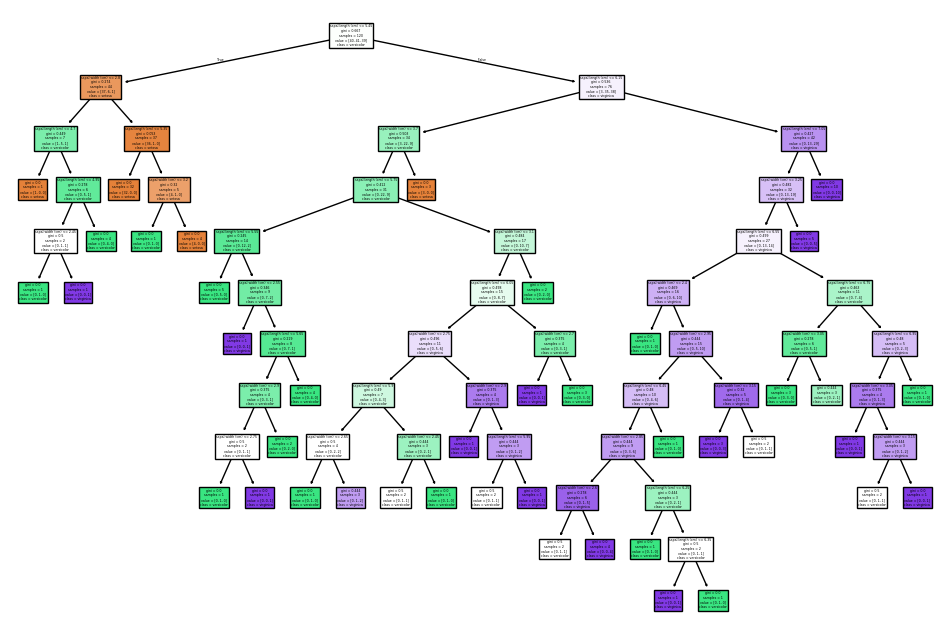

In [6]:
# Plot the Decision Tree
plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=iris.feature_names[:2], class_names=iris.target_names)
plt.show()

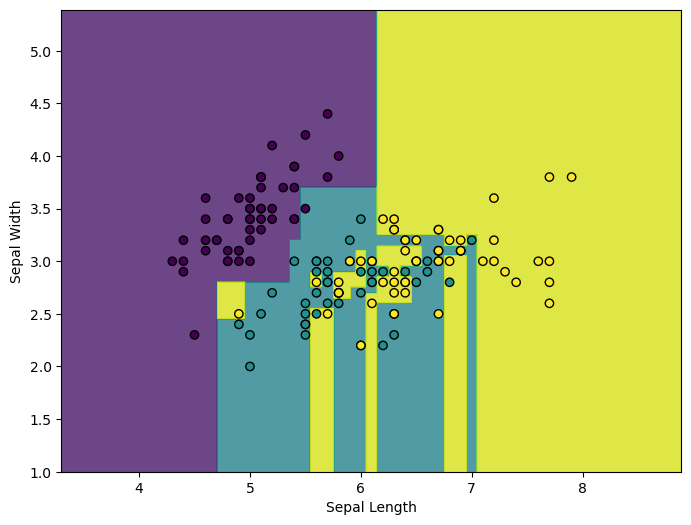

In [7]:
# Plot the Decision boundary
plt.figure(figsize=(8,6))
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                    np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:,0], X[:,1], c=y, edgecolors='k')
plt.xlabel("Sepal Length")
plt.ylabel('Sepal Width')
plt.show()

if max depth is set equal to `None` it would generally tends to Overfit.

In [8]:
# Model max_depth = 2 for better understanding 
clf_ = DecisionTreeClassifier(max_depth=2)
clf_.fit(X_train, y_train)
r = export_text(clf_, feature_names=iris.feature_names[:2])
print(r)

|--- sepal length (cm) <= 5.45
|   |--- sepal width (cm) <= 2.80
|   |   |--- class: 1
|   |--- sepal width (cm) >  2.80
|   |   |--- class: 0
|--- sepal length (cm) >  5.45
|   |--- sepal length (cm) <= 6.15
|   |   |--- class: 1
|   |--- sepal length (cm) >  6.15
|   |   |--- class: 2

